In [1]:
import numpy as np
import pandas as pd
import networkx as nx
#import json
#import os
import page_ranker as pr
#import import_graph as ig
import inspect_subgraph as isg

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
r=2
h=4

In [3]:
G = nx.balanced_tree(r,h, create_using=nx.MultiDiGraph)
nx.set_node_attributes(G,'vanilla', 'type')
nx.set_edge_attributes(G,'vanilla', 'type')

In [4]:
G.nodes[0]

{'type': 'vanilla'}

In [5]:
G.edges[(0,1,0)]

{'type': 'vanilla'}

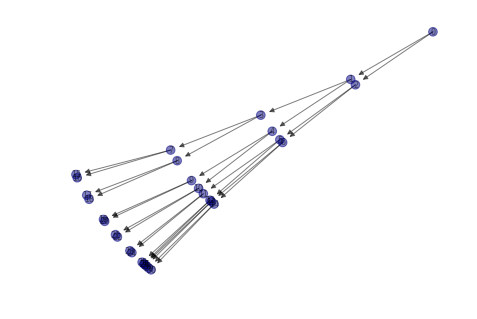

In [6]:
isg.inspectSubGraph(G, G.nodes, expand=False, verbose=False, label=True,pos = "kk")

In [7]:
alpha = 0
iterations = 1000

seed = {n:1/len(G.nodes) for n in G.nodes}
#seed = {n:0 for n in G.nodes}
#seed[0] =1

node_wt_by_type = {'vanilla': 1}
edge_wt_by_type = {'vanilla': (1,1/2)}

self_loop_wt= .001

In [8]:
r, df, g = pr.pageRanker(G,
                         alpha,
                         iterations,
                         seed=seed,
                         initial_value = seed,
                         lazy=False,
                         self_loop_wt=self_loop_wt, 
                         node_wt_by_type =node_wt_by_type,
                         edge_wt_by_type=edge_wt_by_type)

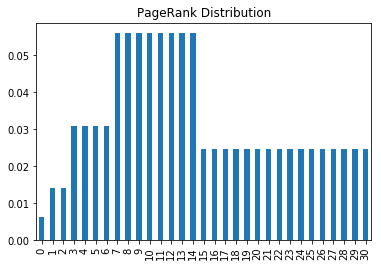

In [9]:
df.tail(1).T.plot(kind='bar',legend=False, title='PageRank Distribution')

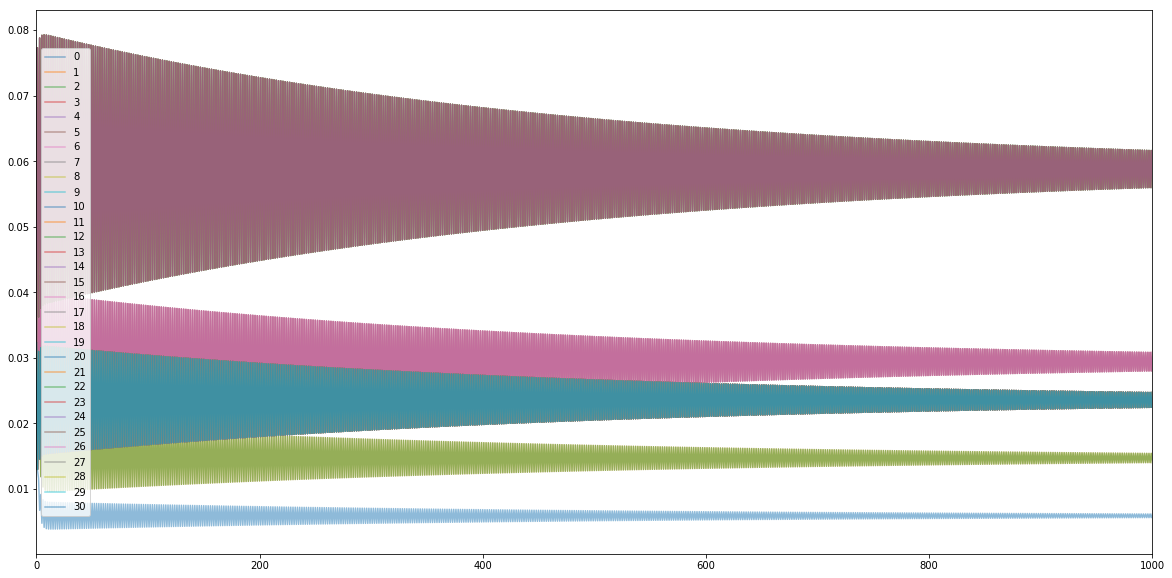

In [19]:
df.plot( figsize=(20,10), alpha=.5)

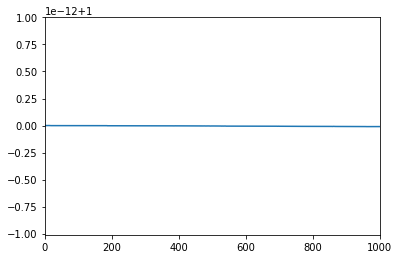

In [11]:
df.sum(axis=1).plot()

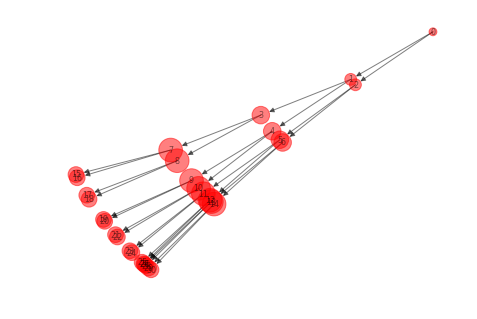

In [12]:
ns = [10000*G.nodes[n]['score'] for n in G.nodes]
nl = {n:n for n in G.nodes}

nx.draw_kamada_kawai(G, node_size=ns, labels=nl, font_size=8, alpha=.5)

In [13]:
nx.get_node_attributes(G,'self_wt')

{0: 0.001,
 1: 0.001,
 2: 0.001,
 3: 0.001,
 4: 0.001,
 5: 0.001,
 6: 0.001,
 7: 0.001,
 8: 0.001,
 9: 0.001,
 10: 0.001,
 11: 0.001,
 12: 0.001,
 13: 0.001,
 14: 0.001,
 15: 0.001,
 16: 0.001,
 17: 0.001,
 18: 0.001,
 19: 0.001,
 20: 0.001,
 21: 0.001,
 22: 0.001,
 23: 0.001,
 24: 0.001,
 25: 0.001,
 26: 0.001,
 27: 0.001,
 28: 0.001,
 29: 0.001,
 30: 0.001}

In [14]:
nx.get_edge_attributes(G,'out_weight')

{(0, 1, 0): 0.5,
 (0, 2, 0): 0.5,
 (1, 3, 0): 0.5,
 (1, 4, 0): 0.5,
 (2, 5, 0): 0.5,
 (2, 6, 0): 0.5,
 (3, 7, 0): 0.5,
 (3, 8, 0): 0.5,
 (4, 9, 0): 0.5,
 (4, 10, 0): 0.5,
 (5, 11, 0): 0.5,
 (5, 12, 0): 0.5,
 (6, 13, 0): 0.5,
 (6, 14, 0): 0.5,
 (7, 15, 0): 0.5,
 (7, 16, 0): 0.5,
 (8, 17, 0): 0.5,
 (8, 18, 0): 0.5,
 (9, 19, 0): 0.5,
 (9, 20, 0): 0.5,
 (10, 21, 0): 0.5,
 (10, 22, 0): 0.5,
 (11, 23, 0): 0.5,
 (11, 24, 0): 0.5,
 (12, 25, 0): 0.5,
 (12, 26, 0): 0.5,
 (13, 27, 0): 0.5,
 (13, 28, 0): 0.5,
 (14, 29, 0): 0.5,
 (14, 30, 0): 0.5}

In [15]:
nx.get_edge_attributes(G,'in_weight')

{(0, 1, 0): 1,
 (0, 2, 0): 1,
 (1, 3, 0): 1,
 (1, 4, 0): 1,
 (2, 5, 0): 1,
 (2, 6, 0): 1,
 (3, 7, 0): 1,
 (3, 8, 0): 1,
 (4, 9, 0): 1,
 (4, 10, 0): 1,
 (5, 11, 0): 1,
 (5, 12, 0): 1,
 (6, 13, 0): 1,
 (6, 14, 0): 1,
 (7, 15, 0): 1,
 (7, 16, 0): 1,
 (8, 17, 0): 1,
 (8, 18, 0): 1,
 (9, 19, 0): 1,
 (9, 20, 0): 1,
 (10, 21, 0): 1,
 (10, 22, 0): 1,
 (11, 23, 0): 1,
 (11, 24, 0): 1,
 (12, 25, 0): 1,
 (12, 26, 0): 1,
 (13, 27, 0): 1,
 (13, 28, 0): 1,
 (14, 29, 0): 1,
 (14, 30, 0): 1}

In [16]:
nx.get_node_attributes(G,'total_wt')

{0: 2.001,
 1: 2.501,
 2: 2.501,
 3: 2.501,
 4: 2.501,
 5: 2.501,
 6: 2.501,
 7: 2.501,
 8: 2.501,
 9: 2.501,
 10: 2.501,
 11: 2.501,
 12: 2.501,
 13: 2.501,
 14: 2.501,
 15: 0.501,
 16: 0.501,
 17: 0.501,
 18: 0.501,
 19: 0.501,
 20: 0.501,
 21: 0.501,
 22: 0.501,
 23: 0.501,
 24: 0.501,
 25: 0.501,
 26: 0.501,
 27: 0.501,
 28: 0.501,
 29: 0.501,
 30: 0.501}